In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline 

In [3]:
df = pd.read_csv("D:/machine learning/py-master/py-master/ML/1_linear_reg/Exercise\per_capita.csv")


In [4]:
df.head()


,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [5]:
df.rename(columns = {"per capita income (US$)":"per_capita"}, inplace = True)


In [6]:
df.head()

,year,per_capita
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


Text(0.5, 1.0, 'Per Capita of Canada')

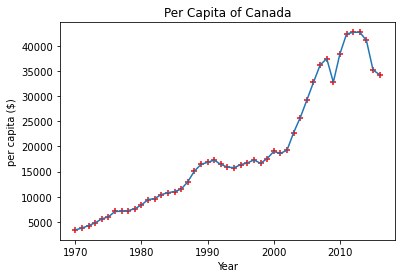

In [7]:
plt.scatter(df.year,df.per_capita,color = "red", marker = '+')
plt.plot(df.year,df.per_capita)
plt.xlabel("Year")
plt.ylabel("per capita ($)")
plt.title("Per Capita of Canada")
#plt.xticks(df.year, rotation = 90)

In [8]:
model = linear_model.LinearRegression()

In [9]:
model.fit(df[["year"]],df.per_capita)

LinearRegression()

In [10]:
model.coef_

array([828.46507522])

In [11]:
model.intercept_

-1632210.7578554575

In [12]:
#predicting per capita for the year 2020
model.predict([[2020]])

C:\Users\Kowcher\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41288.69409442])

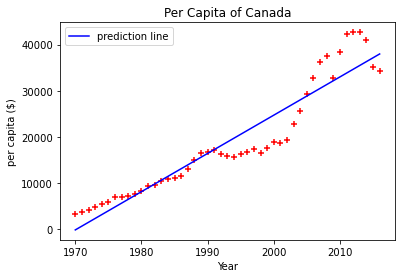

In [13]:
plt.scatter(df.year,df.per_capita,color = "red", marker = '+')
plt.plot(df.year,model.predict(df[["year"]]),color = "blue" ,label ="prediction line")
plt.xlabel("Year")
plt.ylabel("per capita ($)")
plt.title("Per Capita of Canada")
plt.legend()
#plt.xticks(df.year, rotation = 90)

# saving model as file 

In [46]:
# saving model using pickle 
import pickle
with open('percapita_pickle','wb')as f:
    pickle.dump(model,f)
    

In [48]:
# loading model
with open('percapita_pickle','rb') as f:
    m2 = pickle.load(f)

In [49]:
m2.predict([[2020]])

C:\Users\Kowcher\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41288.69409442])

In [31]:
import joblib
joblib.dump(model,'model_per_capita')


['model_per_capita']

In [32]:
m1 = joblib.load('model_per_capita')

In [34]:
m1.predict([[2020]])

C:\Users\Kowcher\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41288.69409442])

# multivariant linear regression


In [14]:
df2 = pd.read_csv("D:/machine learning/py-master/py-master/ML/2_linear_reg_multivariate/homeprices.csv")

In [15]:
df2

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [16]:
#handling NAN data in column badroom by taking median
import math
median_bedroom = math.floor(df2.bedrooms.median())
median_bedroom

4

In [17]:
df2.bedrooms = df2.bedrooms.fillna(median_bedroom)
df2

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [18]:
model2 = linear_model.LinearRegression() 


In [19]:
model2.fit(df2[['area','bedrooms','age']],df2.price)

LinearRegression()

In [20]:
model2.coef_


array([  112.06244194, 23388.88007794, -3231.71790863])

In [21]:
model2.intercept_

221323.00186540425

In [22]:
model2.predict([[3300,4,20]])

C:\Users\Kowcher\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([620050.22241355])

In [23]:
df4 = pd.read_csv("D:/machine learning/py-master/py-master/ML/3_gradient_descent/Exercise/test_scores.csv")
df4.head()

,name,math,cs
0,david,92,98
1,laura,56,68
2,sanjay,88,81
3,wei,70,80
4,jeff,80,83


In [24]:
model4 = linear_model.LinearRegression()

In [25]:
model4.fit(df4[["math"]],df4.cs)

LinearRegression()

In [26]:
model4.coef_

array([1.01773624])

In [27]:
model4.intercept_

1.9152193111569318

In [28]:
model4.predict([[92]])

C:\Users\Kowcher\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([95.54695319])